# Analytics_bookings
- 28 Sept 2020

---
# Assessment details
You will find a SQL dump for a table including customer arrivals (reservations). Create and present a report with the following pieces of information:

1. arrivals per week
2. volume of arrivals per product market (where the accommodation is located)
3. benchmark for the last year (if information is available)
4. filters in the report for YTD (year to date), MTD (month to date) and / or selected period
5. selection for provider (PMS), sales channel
6. totals of gross revenue for every selection / filter
---

- Importing libraries & packages

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

- Invoking & reading the dataset

In [2]:
df=pd.read_csv('analytics_bookings.csv')

In [3]:
df.head()

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,adults,children,babies,pets,channel_id,created_at
0,000013c2-3177-46d7-ae98-ff4538b097d6,6248120,US,17/9/2021,19/9/2021,700.35,0.0,700.35,USD,reservation,8,0,0,0,HOM143-VRBO,3/5/2021 04:16:36
1,0000264b-bc12-4fed-ada6-753c2c2ca2e6,60851394,GB,16/6/2020,20/6/2020,299.00,0.0,299.00,GBP,cancelled,2,0,0,0,BOO142,18/1/2020 14:52:17
2,00002c3f-e114-4092-94f5-5d8f92d94ba3,60879939,GB,14/8/2020,21/8/2020,945.00,0.0,945.00,GBP,reservation,2,2,0,0,BOO142,15/8/2019 09:08:38
3,00005a62-12e2-4227-a3c1-3347ef6ea709,6231475,NL,10/9/2021,13/9/2021,193.50,0.0,161.00,EUR,reservation,2,0,0,0,HOL303,11/8/2021 20:54:52
4,00007861-9d6e-46ed-b777-a569f1d2e698,62411641,US,7/2/2020,10/2/2020,293.21,0.0,293.21,USD,reservation,2,0,0,0,HOM143-VRBO,1/1/2020 23:04:30


In [4]:
# df.drop(columns=['channel_id'])

In [5]:
# df.shape

In [6]:
# df.columns

In [7]:
# df.info

In [8]:
# df['country_code'].value_counts()

# Data Cleaning and Preparation

- Checking and adjusting datatypes

In [9]:
df.dtypes

booking_uuid         object
nextpax_house_id      int64
country_code         object
arrival_date         object
departure_date       object
price               float64
commission_base     float64
rent_only           float64
currency             object
state                object
adults                int64
children              int64
babies                int64
pets                  int64
channel_id           object
created_at           object
dtype: object

In [10]:
df['rent_only'] = pd.to_numeric(df["rent_only"], downcast="float")
df['price'] = pd.to_numeric(df["price"], downcast="float")
df['commission_base'] = pd.to_numeric(df["commission_base"], downcast="float")

In [11]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['departure_date'] = pd.to_datetime(df['departure_date'])
df['created_at'] = pd.to_datetime(df['created_at'])

In [12]:
df.dtypes

booking_uuid                object
nextpax_house_id             int64
country_code                object
arrival_date        datetime64[ns]
departure_date      datetime64[ns]
price                      float32
commission_base            float32
rent_only                  float32
currency                    object
state                       object
adults                       int64
children                     int64
babies                       int64
pets                         int64
channel_id                  object
created_at          datetime64[ns]
dtype: object

- Handling poor quality data

    - Removing Missing and NA/NaN values

Pandas has three modes of dealing with missing data via calling $fillna()$:
- *method='ffill'*: Ffill or forward-fill propagates the last observed non-null value forward until another non-null value is encountered
- *method='bfill'*: Bfill or backward-fill propagates the first observed non-null value backward until another non-null value is met
- *explicit value*: It is also possible to set an exact value to replace all missings. 

In [13]:
df=df.fillna(method='ffill')
df.head()

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,adults,children,babies,pets,channel_id,created_at
0,000013c2-3177-46d7-ae98-ff4538b097d6,6248120,US,2021-09-17,2021-09-19,700.349976,0.0,700.349976,USD,reservation,8,0,0,0,HOM143-VRBO,2021-03-05 04:16:36
1,0000264b-bc12-4fed-ada6-753c2c2ca2e6,60851394,GB,2020-06-16,2020-06-20,299.000000,0.0,299.000000,GBP,cancelled,2,0,0,0,BOO142,2020-01-18 14:52:17
2,00002c3f-e114-4092-94f5-5d8f92d94ba3,60879939,GB,2020-08-14,2020-08-21,945.000000,0.0,945.000000,GBP,reservation,2,2,0,0,BOO142,2019-08-15 09:08:38
3,00005a62-12e2-4227-a3c1-3347ef6ea709,6231475,NL,2021-10-09,2021-09-13,193.500000,0.0,161.000000,EUR,reservation,2,0,0,0,HOL303,2021-11-08 20:54:52
4,00007861-9d6e-46ed-b777-a569f1d2e698,62411641,US,2020-07-02,2020-10-02,293.209991,0.0,293.209991,USD,reservation,2,0,0,0,HOM143-VRBO,2020-01-01 23:04:30


In [14]:
# search = (df['country_code']==0)
# df.loc[df['country_code']==0]

In [15]:
# df = df.astype(object).where(pd.notnull(df),0)
# search = (df['country_code']==0)
# df.loc[df['country_code']==0]

- Handling poor quality data
    - Adjusting negetive values

In [16]:
nv = df['rent_only'] < 0
df[nv]

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,adults,children,babies,pets,channel_id,created_at
97042,3d1bcf5a-890f-4451-9c06-57f5f7d74103,60884162,GB,2021-12-03,2021-03-15,469.0,0.0,-429.0,GBP,cancelled,1,0,0,0,HOM143,2020-02-07 21:01:00
326269,cdb171c1-dd5b-4c51-ad62-d82960f5efc6,608104354,GB,2020-12-21,2020-12-28,1118.0,0.0,-1045.0,GBP,reservation,1,0,0,0,HOM143,2020-09-15 16:03:00
392299,f71b358d-41aa-4bbf-8346-7592adf10fd7,60884406,GB,2020-12-14,2020-12-18,0.0,0.0,-345.0,GBP,reservation,1,0,0,0,HOM143,2020-08-26 16:16:00


In [17]:
df['rent_only']=df['rent_only'].abs()

In [18]:
nv = df['rent_only'] < 0
df[nv]

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,adults,children,babies,pets,channel_id,created_at


In [19]:
nv = df['price'] < 0
df[nv]

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,adults,children,babies,pets,channel_id,created_at
171666,6c222eb0-e906-4679-89ba-445f250bfe48,6051629,NL,2021-05-26,2021-05-27,-16.18,0.0,66.419998,EUR,reservation,4,0,0,0,BOO142,2021-05-25 09:46:05


In [20]:
df['price']=df['price'].abs()

In [21]:
nv = df['price'] < 0
df[nv]

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,adults,children,babies,pets,channel_id,created_at


- Splitting the channel_id ind column

In [22]:
split_channel=df['channel_id'].str.split('-',n=1,expand=True).rename(columns={0:'channel',1:'sub_channel'})
df=pd.concat([df, split_channel], axis=1)
df.head()

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,adults,children,babies,pets,channel_id,created_at,channel,sub_channel
0,000013c2-3177-46d7-ae98-ff4538b097d6,6248120,US,2021-09-17,2021-09-19,700.349976,0.0,700.349976,USD,reservation,8,0,0,0,HOM143-VRBO,2021-03-05 04:16:36,HOM143,VRBO
1,0000264b-bc12-4fed-ada6-753c2c2ca2e6,60851394,GB,2020-06-16,2020-06-20,299.000000,0.0,299.000000,GBP,cancelled,2,0,0,0,BOO142,2020-01-18 14:52:17,BOO142,None
2,00002c3f-e114-4092-94f5-5d8f92d94ba3,60879939,GB,2020-08-14,2020-08-21,945.000000,0.0,945.000000,GBP,reservation,2,2,0,0,BOO142,2019-08-15 09:08:38,BOO142,None
3,00005a62-12e2-4227-a3c1-3347ef6ea709,6231475,NL,2021-10-09,2021-09-13,193.500000,0.0,161.000000,EUR,reservation,2,0,0,0,HOL303,2021-11-08 20:54:52,HOL303,None
4,00007861-9d6e-46ed-b777-a569f1d2e698,62411641,US,2020-07-02,2020-10-02,293.209991,0.0,293.209991,USD,reservation,2,0,0,0,HOM143-VRBO,2020-01-01 23:04:30,HOM143,VRBO


In [23]:
# df.channel_id.count(), df.channel.count(),df.sub_channel.count()

In [24]:
# df.channel_id.nunique(), df.channel.nunique(),df.sub_channel.nunique()

- Setting the decimal places

In [25]:
pd.options.display.float_format = "{:,.2f}".format

- Currency Converter to Euro

In [26]:
# !pip install currencyconverter

In [27]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()
def curr(a,cur):
    try:
        return c.convert(a,cur,'EUR')
    except:
        return a
df["rent_only in EUR"]=df[['rent_only','currency']].apply(lambda x: curr(x.rent_only,x.currency), axis=1)

In [28]:
# round(curr(1,'USD'),2)

In [29]:
# round(curr(1,'GBP'),2)

In [30]:
# round(curr(1,'INR'),2)

In [31]:
# curr(1,'IDR')

In [32]:
# df.tail()

In [33]:
df.head()

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,adults,children,babies,pets,channel_id,created_at,channel,sub_channel,rent_only in EUR
0,000013c2-3177-46d7-ae98-ff4538b097d6,6248120,US,2021-09-17,2021-09-19,700.35,0.00,700.35,USD,reservation,8,0,0,0,HOM143-VRBO,2021-03-05 04:16:36,HOM143,VRBO,598.79
1,0000264b-bc12-4fed-ada6-753c2c2ca2e6,60851394,GB,2020-06-16,2020-06-20,299.00,0.00,299.00,GBP,cancelled,2,0,0,0,BOO142,2020-01-18 14:52:17,BOO142,None,349.61
2,00002c3f-e114-4092-94f5-5d8f92d94ba3,60879939,GB,2020-08-14,2020-08-21,945.00,0.00,945.00,GBP,reservation,2,2,0,0,BOO142,2019-08-15 09:08:38,BOO142,None,"1,104.97"
3,00005a62-12e2-4227-a3c1-3347ef6ea709,6231475,NL,2021-10-09,2021-09-13,193.50,0.00,161.00,EUR,reservation,2,0,0,0,HOL303,2021-11-08 20:54:52,HOL303,None,161.00
4,00007861-9d6e-46ed-b777-a569f1d2e698,62411641,US,2020-07-02,2020-10-02,293.21,0.00,293.21,USD,reservation,2,0,0,0,HOM143-VRBO,2020-01-01 23:04:30,HOM143,VRBO,250.69


In [34]:
# round(wf['rent_only in EUR'].sum(), 2)

- Data Distribution

<AxesSubplot:xlabel='rent_only'>

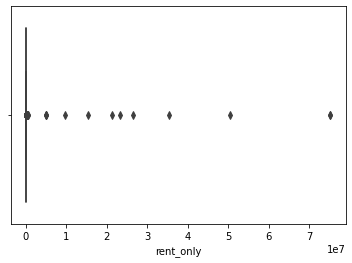

In [35]:
sns.boxplot(x=df['rent_only'])

<AxesSubplot:xlabel='price'>

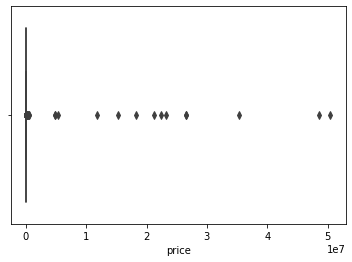

In [36]:
sns.boxplot(x=df['price'])

In [37]:
# sns.boxplot(x=df['commission_base'])

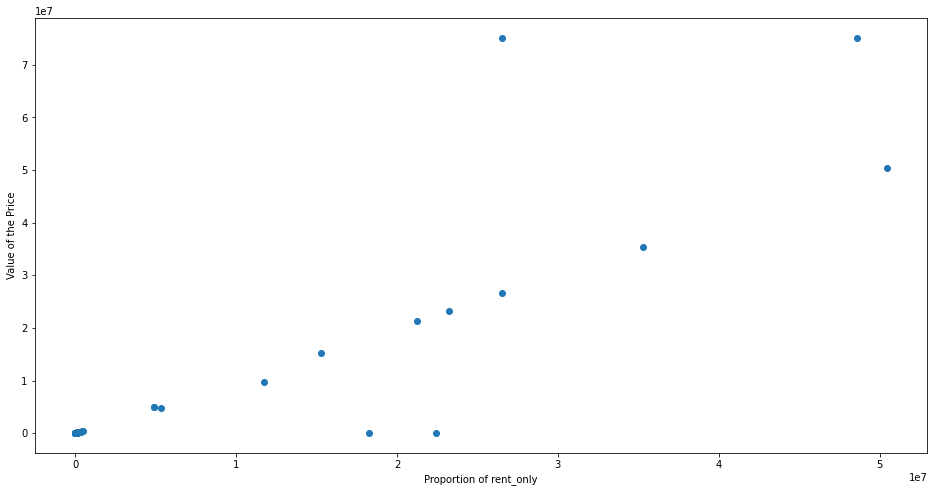

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['price'], df['rent_only'])
ax.set_xlabel('Proportion of rent_only')
ax.set_ylabel('Value of the Price')
plt.show()

- Saving a copy of the cleaned data

In [39]:
# df.to_csv('NextPax_cleaned.csv')

---
# Arrivals per week
---

Creating a new dataframe in which the analysis is applied without effecting the cleaned dataset

In [40]:
wf = df
wf.head()

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,adults,children,babies,pets,channel_id,created_at,channel,sub_channel,rent_only in EUR
0,000013c2-3177-46d7-ae98-ff4538b097d6,6248120,US,2021-09-17,2021-09-19,700.35,0.00,700.35,USD,reservation,8,0,0,0,HOM143-VRBO,2021-03-05 04:16:36,HOM143,VRBO,598.79
1,0000264b-bc12-4fed-ada6-753c2c2ca2e6,60851394,GB,2020-06-16,2020-06-20,299.00,0.00,299.00,GBP,cancelled,2,0,0,0,BOO142,2020-01-18 14:52:17,BOO142,None,349.61
2,00002c3f-e114-4092-94f5-5d8f92d94ba3,60879939,GB,2020-08-14,2020-08-21,945.00,0.00,945.00,GBP,reservation,2,2,0,0,BOO142,2019-08-15 09:08:38,BOO142,None,"1,104.97"
3,00005a62-12e2-4227-a3c1-3347ef6ea709,6231475,NL,2021-10-09,2021-09-13,193.50,0.00,161.00,EUR,reservation,2,0,0,0,HOL303,2021-11-08 20:54:52,HOL303,None,161.00
4,00007861-9d6e-46ed-b777-a569f1d2e698,62411641,US,2020-07-02,2020-10-02,293.21,0.00,293.21,USD,reservation,2,0,0,0,HOM143-VRBO,2020-01-01 23:04:30,HOM143,VRBO,250.69


- No *passengers* per week for all year

In [41]:
sum_column = wf["adults"] + wf["children"] + wf["babies"]
wf["no_Passengers"] = sum_column
wf.head(3)

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,adults,children,babies,pets,channel_id,created_at,channel,sub_channel,rent_only in EUR,no_Passengers
0,000013c2-3177-46d7-ae98-ff4538b097d6,6248120,US,2021-09-17,2021-09-19,700.35,0.00,700.35,USD,reservation,8,0,0,0,HOM143-VRBO,2021-03-05 04:16:36,HOM143,VRBO,598.79,8
1,0000264b-bc12-4fed-ada6-753c2c2ca2e6,60851394,GB,2020-06-16,2020-06-20,299.00,0.00,299.00,GBP,cancelled,2,0,0,0,BOO142,2020-01-18 14:52:17,BOO142,None,349.61,2
2,00002c3f-e114-4092-94f5-5d8f92d94ba3,60879939,GB,2020-08-14,2020-08-21,945.00,0.00,945.00,GBP,reservation,2,2,0,0,BOO142,2019-08-15 09:08:38,BOO142,None,"1,104.97",4


In [42]:
wf['week'] = wf['arrival_date'].apply(lambda x: "%d" % (x.week))
wf['year'] = wf['arrival_date'].apply(lambda x: "%d" % (x.year))
wf.head(3)

,booking_uuid,nextpax_house_id,country_code,arrival_date,departure_date,price,commission_base,rent_only,currency,state,...,babies,pets,channel_id,created_at,channel,sub_channel,rent_only in EUR,no_Passengers,week,year
0,000013c2-3177-46d7-ae98-ff4538b097d6,6248120,US,2021-09-17,2021-09-19,700.35,0.00,700.35,USD,reservation,...,0,0,HOM143-VRBO,2021-03-05 04:16:36,HOM143,VRBO,598.79,8,37,2021
1,0000264b-bc12-4fed-ada6-753c2c2ca2e6,60851394,GB,2020-06-16,2020-06-20,299.00,0.00,299.00,GBP,cancelled,...,0,0,BOO142,2020-01-18 14:52:17,BOO142,None,349.61,2,25,2020
2,00002c3f-e114-4092-94f5-5d8f92d94ba3,60879939,GB,2020-08-14,2020-08-21,945.00,0.00,945.00,GBP,reservation,...,0,0,BOO142,2019-08-15 09:08:38,BOO142,None,"1,104.97",4,33,2020


- No *passengers* per week for all year

In [43]:
pass_agr=pd.DataFrame(wf.groupby(['year','week'])['no_Passengers'].sum().reset_index(name="Passengers_w"))
pass_agr['week']=pass_agr['week'].astype(int)
pass_agr=pass_agr.sort_values(by=['year','week'],ascending=True)
pass_agr

,year,week,Passengers_w
0,2020,1,9748
11,2020,2,24943
22,2020,3,9165
33,2020,4,9290
44,2020,5,10148
...,...,...,...
159,2023,52,9
162,2024,52,4
163,2025,12,8
164,2025,13,1


- No *passengers* per week for all year (table)

In [44]:
pass_years=pass_agr.pivot_table(values='Passengers_w', 
                      index='year', columns='week', 
                      aggfunc='first')
pass_years = pass_years.astype(object).where(pd.notnull(pass_years),0)
pass_years

week,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
year,,,,,,,,,,,,,,,,,,,,,
2020,"9,748.00","24,943.00","9,165.00","9,290.00","10,148.00","13,425.00","20,205.00","18,453.00","15,137.00","21,435.00",...,"7,111.00","22,443.00","13,803.00","5,963.00","8,098.00","10,160.00","13,051.00","6,419.00","14,301.00","10,838.00"
2021,"21,466.00","4,763.00","3,594.00","4,429.00","17,229.00","13,902.00","8,542.00","8,096.00","20,457.00","16,408.00",...,"13,065.00","9,673.00","3,554.00","4,451.00","9,827.00","17,582.00","2,692.00","5,837.00","4,448.00","2,035.00"
2022,730.00,983.00,797.00,990.00,937.00,623.00,"1,796.00","1,002.00",888.00,463.00,...,"1,129.00",140.00,0,4.00,"1,044.00",283.00,0,4.00,385.00,0
2023,5.00,2.00,0,0,0,0,2.00,0,4.00,0,...,0,0,0,0,0,0,0,0,9.00,0
2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.00,0
2025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- No *passengers* per week for all year (diagram)

<AxesSubplot:xlabel='week'>

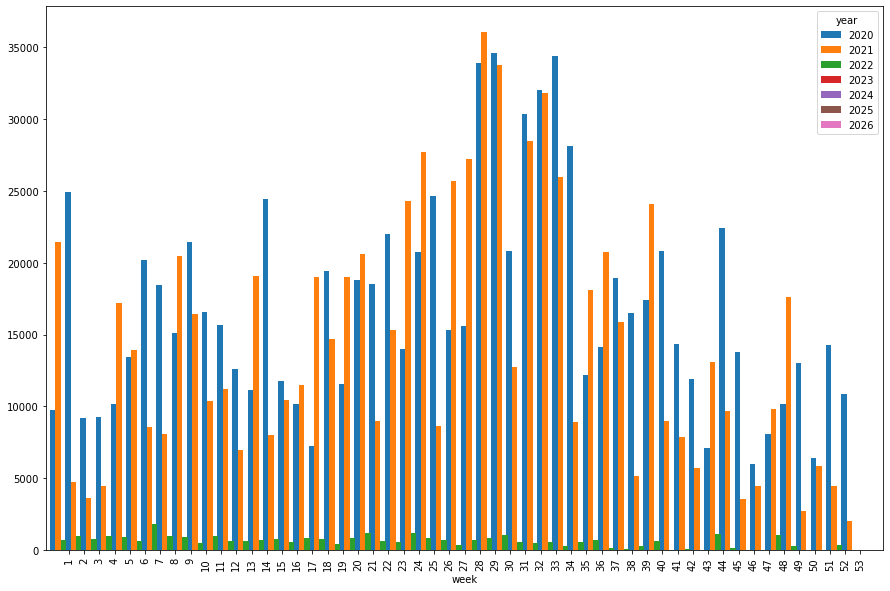

In [45]:
pass_years.T.plot(kind="bar",figsize=(15,10),width=2.5)

In [46]:
# No *passengers* per week for 2020 (table)?

In [47]:
# pass_years.loc['2020']

In [48]:
# No *passengers* per week for *2020* (daigram)

In [49]:
# pass_years.loc['2020'].plot(kind="bar",figsize=(15,10),width=0.8)

In [50]:
# pass_years=pass_years
# pass_years
# pass_years['2020','2021'].plot(kind="bar",figsize=(15,10),width=1.5)

- No *reservations* per week

In [51]:
wf=df
wf['week'] = wf['arrival_date'].apply(lambda x: "%d" % (x.week))
wf['year'] = wf['arrival_date'].apply(lambda x: "%d" % (x.year))

In [52]:
weeks_agr=pd.DataFrame(wf.groupby(['year'])['week'].value_counts().reset_index(name="reservations_w"))
weeks_agr['week']=weeks_agr['week'].astype(int)
weeks_agr=weeks_agr.sort_values(by=['year','week'],ascending=True)
weeks_agr

,year,week,reservations_w
46,2020,1,2301
7,2020,2,5458
44,2020,3,2355
42,2020,4,2462
40,2020,5,2666
...,...,...,...
159,2023,52,1
162,2024,52,1
163,2025,12,1
164,2025,13,1


- No *reservations* per week for all year (table)

In [53]:
weeks_agr=weeks_agr.pivot_table(values='reservations_w', 
                      index='year', columns='week', 
                      aggfunc='first')
weeks_agr = weeks_agr.astype(object).where(pd.notnull(weeks_agr),0)
weeks_agr

week,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
year,,,,,,,,,,,,,,,,,,,,,
2020,"2,301.00","5,458.00","2,355.00","2,462.00","2,666.00","3,435.00","4,857.00","4,675.00","3,790.00","5,111.00",...,"1,809.00","5,152.00","3,145.00","1,390.00","1,626.00","2,390.00","3,411.00","1,385.00","2,934.00","2,278.00"
2021,"5,182.00","1,079.00",899.00,"1,152.00","3,930.00","3,533.00","2,125.00","2,010.00","4,760.00","3,915.00",...,"3,076.00","2,723.00",728.00,796.00,"2,399.00","4,332.00",467.00,"1,052.00",776.00,621.00
2022,150.00,169.00,167.00,193.00,176.00,102.00,337.00,189.00,176.00,91.00,...,199.00,28.00,0,1.00,194.00,46.00,0,1.00,108.00,0
2023,1.00,1.00,0,0,0,0,1.00,0,1.00,0,...,0,0,0,0,0,0,0,0,1.00,0
2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.00,0
2025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- No *reservations* per week for all year (diagram)

<AxesSubplot:xlabel='week'>

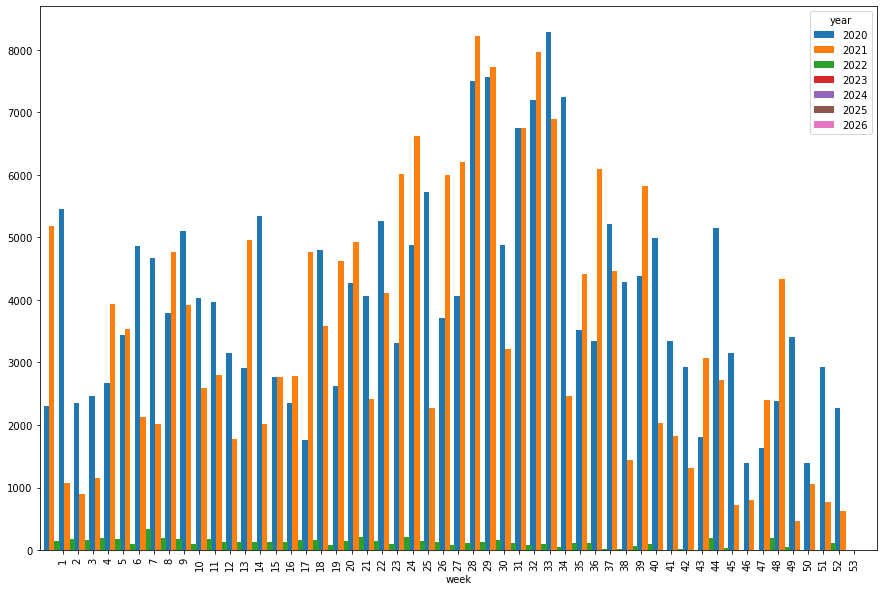

In [54]:
weeks_agr.T.plot(kind="bar",figsize=(15,10),width=2.5)

In [55]:
# No *reservations* per week for 2020 (table)

In [56]:
# weeks_agr.loc['2020']

In [57]:
# No *reservations* per week for 2020 (diagram)

In [58]:
# weeks_agr.loc['2020'].plot(kind="bar",figsize=(15,10),width=0.8)

------
# Volume of arrivals per product market
------

- No of bookings per product market

In [59]:
ch_agr=pd.DataFrame(wf.groupby(['country_code'])['channel'].value_counts().reset_index(name='bookings_ch'))
ch_agr

,country_code,channel,bookings_ch
0,AD,BOO142,22
1,AD,AIR298,2
2,AD,HOM143,2
3,AD,EDO334,1
4,AE,BOO142,105
...,...,...,...
716,ZA,GOO328,6
717,ZA,HOM143,2
718,ZA,EXP270,1
719,ZM,AIR298,1


In [60]:
# ch_agr=pd.DataFrame(wf.groupby(['country_code'])['channel_id'].value_counts().reset_index(name='bookings_ch'))
# ch_agr

- No of passengers per product market

In [61]:
pass_agr=pd.DataFrame(wf.groupby(['country_code'])['channel'].value_counts().reset_index(name='Passengers_ch'))
pass_agr

,country_code,channel,Passengers_ch
0,AD,BOO142,22
1,AD,AIR298,2
2,AD,HOM143,2
3,AD,EDO334,1
4,AE,BOO142,105
...,...,...,...
716,ZA,GOO328,6
717,ZA,HOM143,2
718,ZA,EXP270,1
719,ZM,AIR298,1


---
# Benchmark for the last year
---

In [62]:
# years=wf['year'].value_counts().index
# year={}
# for x in years:
# #     print(x)
#     year[x]=pd.DataFrame(weeks_agr['week'][x])
#     year[x].index = year[x].index.astype(int)
#     # print(type(t4.index))
#     year[x]=year[x].sort_index().T
#     year[x].index=[x]
# years_weeks=pd.DataFrame(columns=[x for x in range(1,54)])
# def agrr_week(x):
#     return pd.concat([years_weeks,year[x]],axis=0)
# for x in year:
#     years_weeks=agrr_week(x)
# years_weeks = years_weeks.astype(object).where(pd.notnull(years_weeks),0)
# years_weeks

In [63]:
# weeks_agr=weeks_agr.pivot_table(values='reservations_w', 
#                       index='year', columns='week', 
#                       aggfunc='first')
# weeks_agr = weeks_agr.astype(object).where(pd.notnull(years_weeks),0)
# weeks_agr

In [64]:
# years_weeks.T.plot(kind="bar",figsize=(15,10),width=1.5)

In [65]:
# weeks_agr_2020 = pd.Series(weeks_agr.loc['2020'])
# weeks_agr_2020

- No of *Reservations* per week for last year (i.e., 2020) (table)

In [66]:
weeks_agr.loc[['2020']]

week,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
year,,,,,,,,,,,,,,,,,,,,,
2020,"2,301.00","5,458.00","2,355.00","2,462.00","2,666.00","3,435.00","4,857.00","4,675.00","3,790.00","5,111.00",...,"1,809.00","5,152.00","3,145.00","1,390.00","1,626.00","2,390.00","3,411.00","1,385.00","2,934.00","2,278.00"


- No of Reservations per week for last year (i.e., 2020) (diagram)

<AxesSubplot:xlabel='week'>

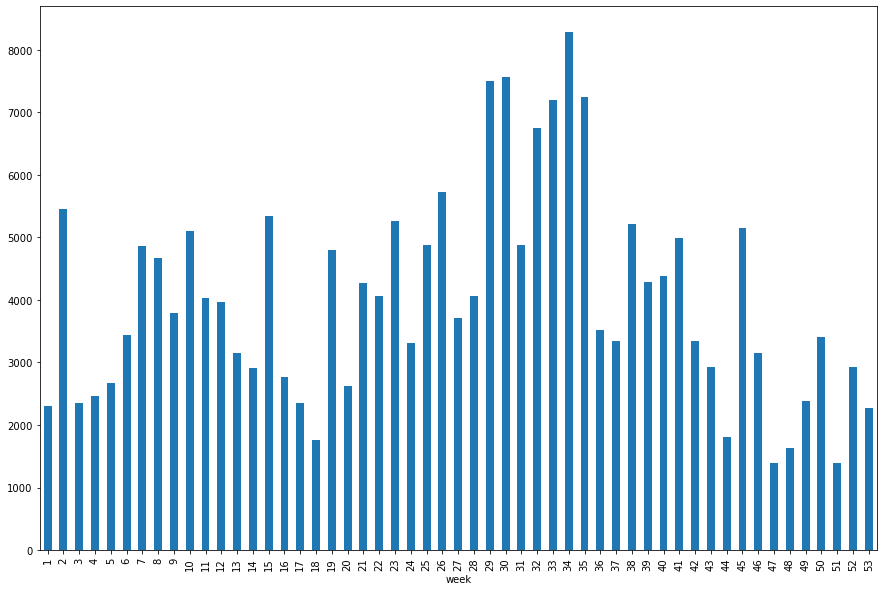

In [67]:
weeks_agr.loc['2020'].plot(kind="bar",figsize=(15,10))

- No of *passengers* per week for last year (i.e., 2020) (table)

In [68]:
pass_years.loc[['2020']]

week,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
year,,,,,,,,,,,,,,,,,,,,,
2020,"9,748.00","24,943.00","9,165.00","9,290.00","10,148.00","13,425.00","20,205.00","18,453.00","15,137.00","21,435.00",...,"7,111.00","22,443.00","13,803.00","5,963.00","8,098.00","10,160.00","13,051.00","6,419.00","14,301.00","10,838.00"


- No of *passengers* per week for last year (i.e., 2020) (diagram)

<AxesSubplot:xlabel='week'>

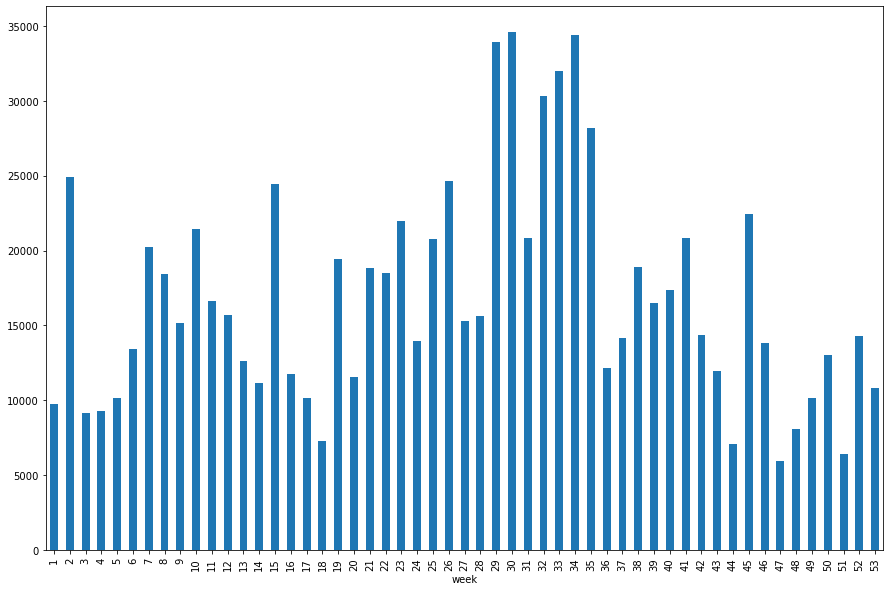

In [69]:
pass_years.loc['2020'].plot(kind="bar",figsize=(15,10))

# Filters in the report for YTD (year to date), MTD (month to date) and / or selected period

- Example:
    - Input:
        - Enter the start Date dd/mm/yyyy :  *01/01/2020*
        - Enter the end Date dd/mm/yyyy :  *31/12/2020*
    - Output:
        - country ,channel, & no Passengers

In [70]:
wf['date'] = wf['arrival_date'].apply(lambda x: "%d" % (x.day))

In [71]:
d=input('Enter the start Date dd/mm/yyyy : ')
n=input('Enter the end Date dd/mm/yyyy : ')
search = (wf['arrival_date'] > pd.Timestamp(d)) & (wf['arrival_date'] <= pd.Timestamp(n))
# wf.loc[search]    # for the whole columns.
pwf=wf[['country_code','channel','no_Passengers']].loc[search]
pwf

Enter the start Date dd/mm/yyyy :  01/01/2020
Enter the end Date dd/mm/yyyy :  31/12/2020


,country_code,channel,no_Passengers
1,GB,BOO142,2
2,GB,BOO142,4
4,US,HOM143,2
5,GB,HOM143,4
6,DE,HOM143,2
...,...,...,...
406424,IT,BOO142,7
406426,CH,CAM323,5
406427,DK,BOO142,2
406428,AU,BOO142,2


---
# Selection for provider (PMS), sales channel
- Note: channel is assumed to be the provider (PMS)
---

- No of reservations per channel & nextpax_house_id

In [72]:
pms=wf.groupby(['nextpax_house_id'])['channel'].value_counts().reset_index(name="Reservations_ch")
pms

,nextpax_house_id,channel,Reservations_ch
0,432,AIR298,3
1,436,AIR298,6
2,521,BOO142,15
3,581,BOO142,30
4,581,HOM143,1
...,...,...,...
107221,640987212,CTR342,1
107222,640987229,CTR342,1
107223,640989624,CTR342,1
107224,640990025,GOO328,1


---
# Totals of gross revenue for every selection / filter
---

- Total Revenue in Euro

In [73]:
# wf['rent_only in EUR'].sum()

In [74]:
# round(rev_ch.revenue.sum(), 2)

In [75]:
# wf['rent_only'].sum()

In [76]:
round(wf['rent_only in EUR'].sum(), 2)

350084955.87

- Revenue per *channel* for each year

In [77]:
rev_ch = wf.groupby(['channel','year'])['rent_only in EUR'].sum().reset_index(name="revenue_ch").sort_values(by=['revenue_ch'],ascending=False)
rev_ch

,channel,year,revenue_ch
19,BOO142,2020,"76,975,095.63"
62,HOM143,2021,"75,076,661.04"
61,HOM143,2020,"64,581,135.53"
20,BOO142,2021,"45,121,611.94"
5,AIR298,2021,"25,660,313.85"
...,...,...,...
109,TRE327,2022,330.00
102,TRA277,2020,296.38
37,CTR342,2022,164.18
23,BOO142,2026,0.00


- Revenue per *channel* for each year

In [78]:
rev_ch_all=rev_ch.pivot_table(values='revenue_ch', 
                      index=rev_ch.channel, columns='year', 
                      aggfunc='first').sort_values(by=['2020'],ascending=False)
rev_ch_all['rev_sum_ch']=rev_ch_all.sum(axis=1)

rev_ch_all = rev_ch_all.astype(object).where(pd.notnull(rev_ch_all),0)
rev_ch_all.sort_values(by=['rev_sum_ch'],ascending=False)
rev_ch_all

year,2020,2021,2022,2023,2024,2025,2026,rev_sum_ch
channel,,,,,,,,
BOO142,"76,975,095.63","45,121,611.94","2,457,221.41",399.37,0,0,0.00,"124,554,328.34"
HOM143,"64,581,135.53","75,076,661.04","9,176,195.57","12,137.41","1,454.34","2,340.98",0,"148,849,924.88"
AIR298,"16,320,950.16","25,660,313.85","882,751.94",0,0,0,0,"42,864,015.95"
HOT138,"4,558,479.28","5,937,889.26","72,868.67",0,0,0,0,"10,569,237.21"
HOO135,"2,714,131.40","132,796.59",0,0,0,0,0,"2,846,927.99"
...,...,...,...,...,...,...,...,...
TRA368,0,603.85,961.78,0,0,0,0,"1,565.63"
URB386,0,"14,423.52","8,675.60",0,0,0,0,"23,099.12"
VAC372,0,"10,616.62",0,0,0,0,0,"10,616.62"


- Revenue per top 10 channel *for 2020, 2021 & 2022*

<AxesSubplot:xlabel='channel'>

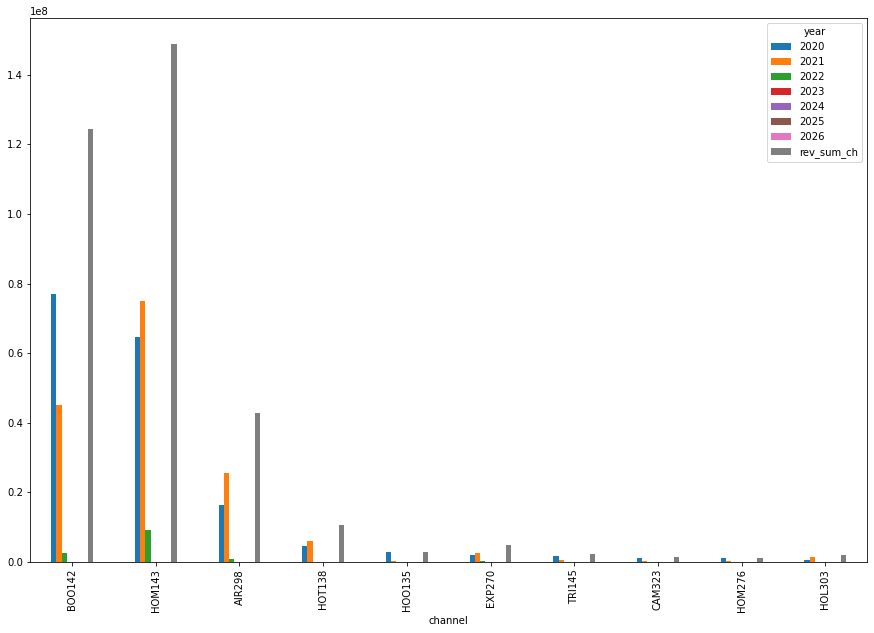

In [79]:
rev_ch_all.head(10).plot.bar(figsize=(15,10))

In [80]:
# - Revenue per *to 10 channel_id* for 2020, 2021 & 2022 *without outlies*

In [81]:
# rev_ch_all[['2020','2021','2022']][rev_ch_all.index !='BOO142'].head(10).plot.bar(figsize=(15,10))

In [82]:
#- Revenue per to 10 channel_id for *all years* *without outlies*

In [83]:
# rev_ch_all[rev_ch_all.index !='BOO142'].head(10).plot.bar(figsize=(15,10))

- Mean Revenue per year based on channel

<AxesSubplot:xlabel='year'>

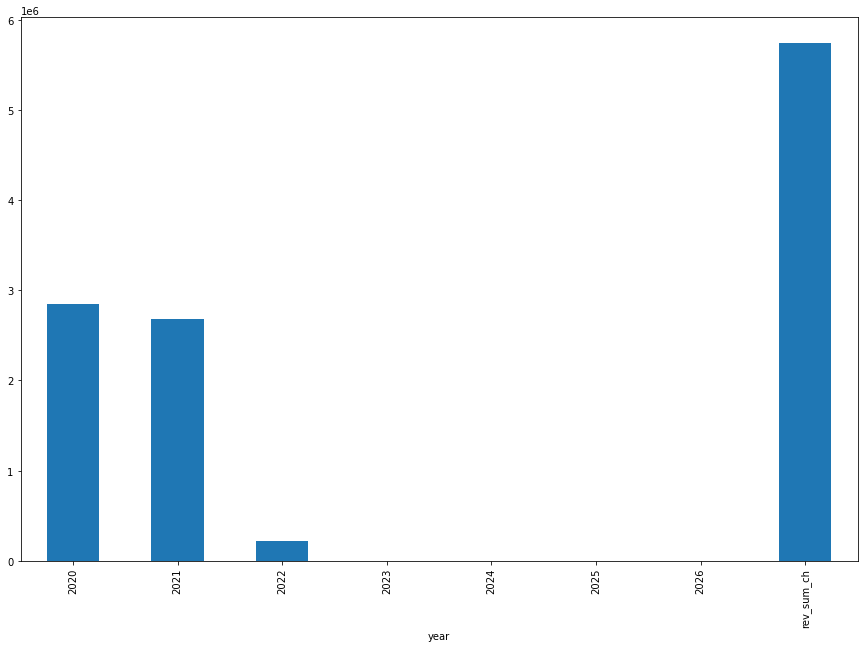

In [84]:
rev_ch_all.mean().plot(kind="bar",figsize=(15,10))

<!-- - comparison of Revenues for top 10 per 2020, 2021, & 2022 *without outliers* -->

In [85]:
# rev_ch_all[['2020','2021','2022']][rev_ch_all.index !='BOO142'].head(10).plot(kind = 'line',figsize=(15,10))

- General discription of the Revenue per *channel*
    - The *describe()* function computes a summary of statistics pertaining to the DataFrame columns.

- General discription of the Revenue per *channel* for all years

In [86]:
rev_ch.describe()

,revenue_ch
count,128.00
mean,"2,735,038.72"
std,"11,876,393.09"
min,0.00
25%,"3,059.34"
50%,"24,781.78"
75%,"285,295.94"
max,"76,975,095.63"


<AxesSubplot:>

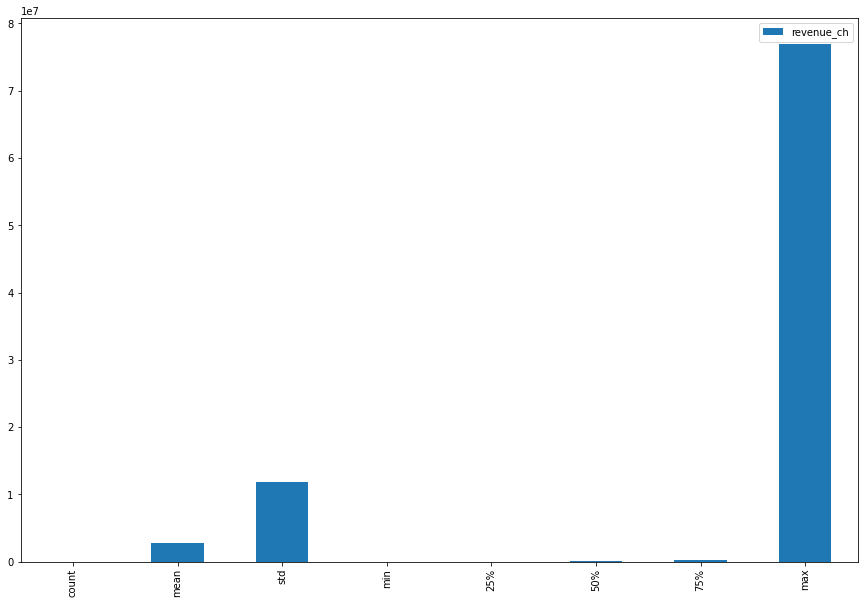

In [87]:
rev_ch.describe().plot(figsize=(15,10),kind='bar')

- General discription of the Revenue per *channel* for each year

In [88]:
# rev_ch_all.describe()

In [89]:
# rev_ch_all.describe().plot(figsize=(15,10),kind='bar')

- Revenue per *Country* for each year

In [90]:
rev_count=wf.groupby(['country_code','year'])['rent_only'].sum().reset_index(name="revenue_con").sort_values(by=['revenue_con'],ascending=False)
rev_count

,country_code,year,revenue_con
22,AU,2020,"198,683,440.00"
385,US,2020,"120,512,712.00"
386,US,2021,"92,238,456.00"
138,GB,2020,"65,347,608.00"
332,RU,2020,"50,856,012.00"
...,...,...,...
303,PF,2020,92.00
173,HR,2022,79.00
151,GH,2021,77.00
63,BZ,2020,38.00


In [91]:
# rev_count.sort_values(by=['revenue'], ascending=False)

- Revenue per *Country* for each year

In [92]:
rev_count_all=rev_count.pivot_table(values='revenue_con', 
                      index=rev_count.country_code, columns='year', 
                      aggfunc='first')
rev_count_all = rev_count_all.astype(object).where(pd.notnull(rev_count_all),0)

rev_count_all['rev_sum_count']=rev_count_all.sum(axis=1)
rev_count_all = rev_count_all.sort_values(by=['rev_sum_count'],ascending=False)
rev_count_all

year,2020,2021,2022,2023,2024,2025,2026,rev_sum_count
country_code,,,,,,,,
US,"120,512,712.00","92,238,456.00","10,567,533.00","14,663.02","1,701.00","2,738.01",0,"223,337,803.03"
AU,"198,683,440.00","142,938.02","13,164.00",0,0,0,0,"198,839,542.02"
GB,"65,347,608.00","10,960,174.00","2,022,490.25",0,0,0,0,"78,330,272.25"
RU,"50,856,012.00","344,390.81","15,336.01",0,0,0,0,"51,215,738.82"
DE,"27,427,628.00","20,818,742.00","1,268,654.75",0,0,0,0,"49,515,024.75"
...,...,...,...,...,...,...,...,...
VC,0,217.80,0,0,0,0,0,217.80
BI,0,188.00,0,0,0,0,0,188.00
BF,0,180.00,0,0,0,0,0,180.00


In [93]:
# x=rev_count_all.T.sum().reset_index(name='sumation').sort_values(by=['sumation'],ascending=False)
# x

In [94]:
# rev_count_all.head(10).T.sum().plot.bar()

- Revenue per *to 10 Countries* for 2020, 2021 & 2022

<AxesSubplot:xlabel='country_code'>

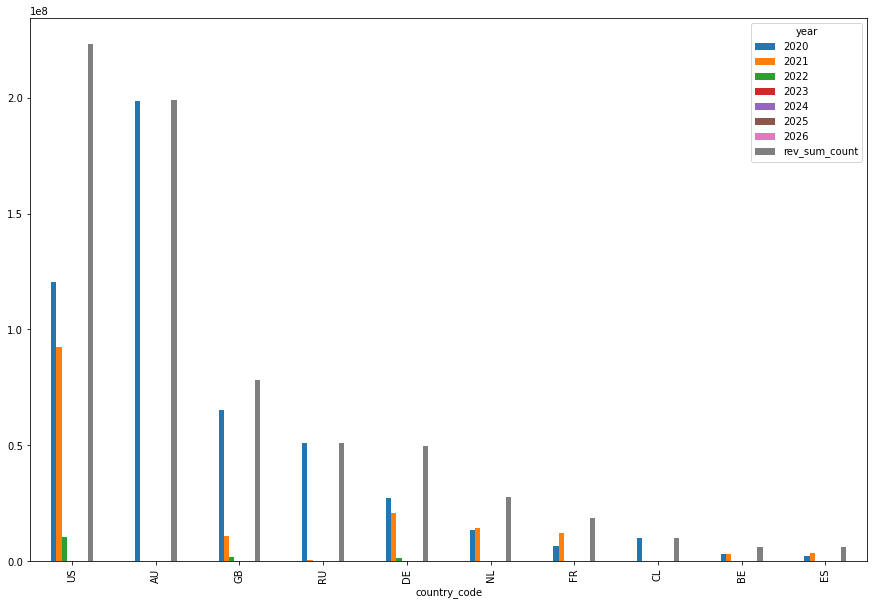

In [95]:
rev_count_all.head(10).plot.bar(figsize=(15,10))

- Mean Revenue per year based on *countries*

<AxesSubplot:xlabel='year'>

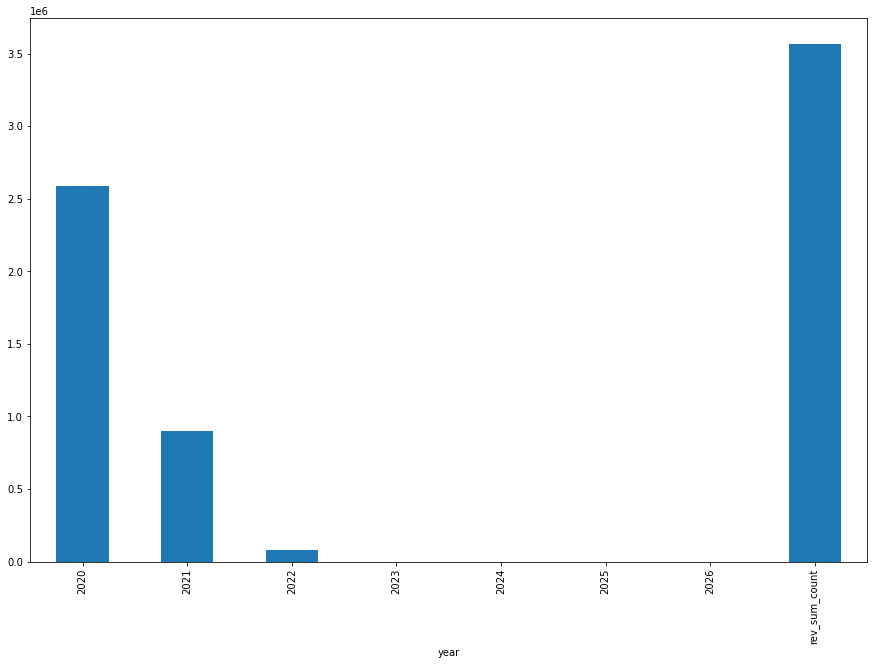

In [96]:
rev_count_all.mean().plot(kind="bar",figsize=(15,10))

- comparison of Revenues for top 10 countries for 2020, 2021, & 2022 *without outliers*

<AxesSubplot:xlabel='country_code'>

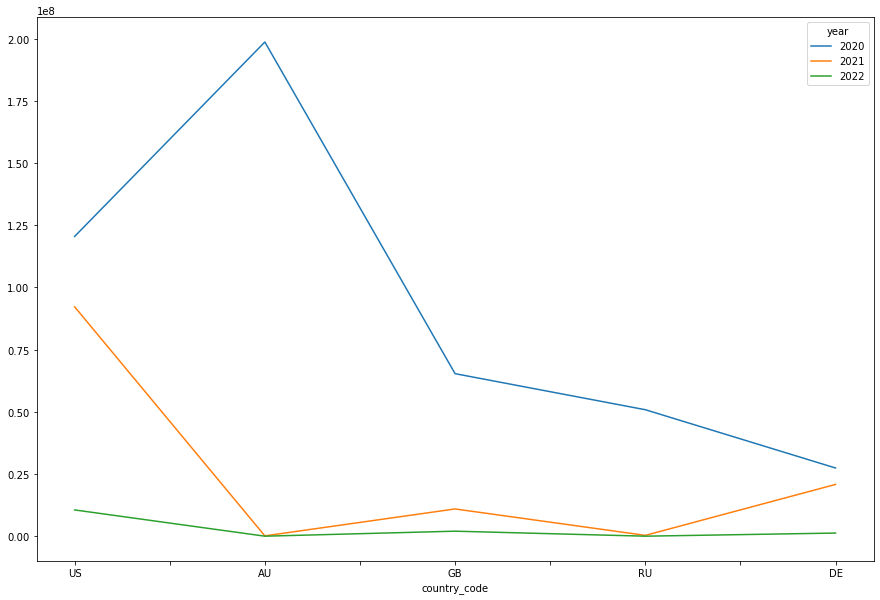

In [97]:
rev_count_all[['2020','2021','2022']].head().plot(kind = 'line',figsize=(15,10))

- General discription of the Revenue per *country*
    - The *describe()* function computes a summary of statistics pertaining to the DataFrame columns.

In [98]:
rev_count.describe()

,revenue_con
count,417.00
mean,"1,727,890.75"
std,"13,002,069.00"
min,0.00
25%,"1,138.00"
50%,"6,466.02"
75%,"53,132.37"
max,"198,683,440.00"


<AxesSubplot:>

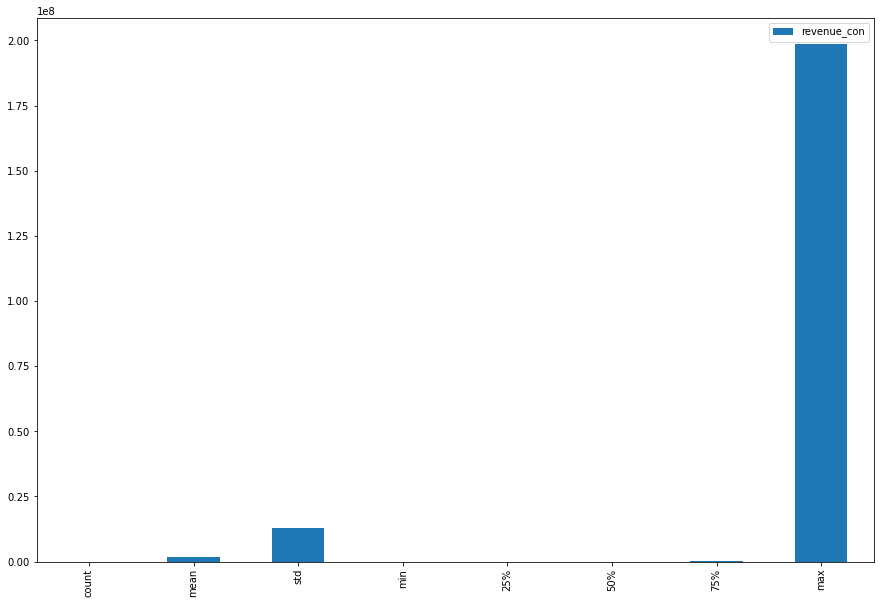

In [99]:
rev_count.describe().plot(kind='bar',figsize=(15,10))

In [100]:
# rev_count_all.describe()

In [101]:
# rev_count_all.describe().plot(kind='bar',figsize=(15,10))

In [102]:
# sns.boxplot(x=wf['rent_only'])

In [103]:
# import sys
# print(sys.version)

# Thank you !
- Yousef Qasem